In [1]:
import numpy as np
import pandas as pd
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
from lc_classifier.utils import plot_astro_object
from lc_classifier.features.core.base import AstroObject
from lc_classifier.features.extractors.period_extractor import PeriodExtractor
from typing import List

In [ ]:
astro_objects_batch = pd.read_pickle('data_241209_ndetge8_ao_shorten_features/8_astro_objects_batch_000.pkl')
astro_objects_batch

[{'metadata':          name             value
  0         aid  aid_ZTF17aaaocpq
  1         oid      ZTF17aaaocpq
  2          W1             8.356
  3          W2             7.336
  4          W3              4.39
  5          W4             1.756
  6    sgscore1          0.436762
  7   distpsnr1          0.467723
  8      sgmag1           15.1409
  9      srmag1            13.305
  10     simag1             12.92
  11     szmag1            12.727,
  'detections':               candid  brightness  e_brightness fid           mjd  detected  \
  oid                                                                          
  ZTF17aaaocpq      16   15.177183      0.004652   g  58330.486824      True   
  ZTF17aaaocpq      17   14.408706      0.001163   r  58333.487093      True   
  ZTF17aaaocpq      18   14.414641      0.000833   r  58336.463887      True   
  ZTF17aaaocpq      19   15.181581      0.002011   g  58336.489409      True   
  ZTF17aaaocpq      16 -298.117703     13.214588   

In [5]:
astro_objects_batch = pd.read_pickle('data_241209_ndetge8_ao_shorten_features/16_astro_objects_batch_000.pkl')
astro_objects_batch

[{'metadata':          name             value
  0         aid  aid_ZTF17aaaocpq
  1         oid      ZTF17aaaocpq
  2          W1             8.356
  3          W2             7.336
  4          W3              4.39
  5          W4             1.756
  6    sgscore1          0.436762
  7   distpsnr1          0.467723
  8      sgmag1           15.1409
  9      srmag1            13.305
  10     simag1             12.92
  11     szmag1            12.727,
  'detections':               candid  brightness  e_brightness fid           mjd  detected  \
  oid                                                                          
  ZTF17aaaocpq      16   15.177183      0.004652   g  58330.486824      True   
  ZTF17aaaocpq      17   14.408706      0.001163   r  58333.487093      True   
  ZTF17aaaocpq      18   14.414641      0.000833   r  58336.463887      True   
  ZTF17aaaocpq      19   15.181581      0.002011   g  58336.489409      True   
  ZTF17aaaocpq      20   14.376756      0.000820   

In [67]:
selected_aid = 'aid_ZTF18accldzb'

data_dir = os.listdir('data_231130')
data_dir = [filename for filename in data_dir if 'astro_objects_batch' in filename]
data_dir = sorted(data_dir)

for batch_filename in tqdm(data_dir):
    full_filename = os.path.join('data_231130', batch_filename)
    astro_objects_batch = pd.read_pickle(full_filename)
    for astro_object in astro_objects_batch:
        astro_object_aid = astro_object.metadata[astro_object.metadata['name'] == 'aid']['value'].values[0]
        if astro_object_aid == selected_aid:
            print(astro_object)
            break
    if astro_object_aid == selected_aid:
        print('exit')
        break

 53%|█████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                           | 99/188 [00:14<00:12,  7.06it/s]

AstroObject(metadata=  name             value
0  aid  aid_ZTF18accldzb
1  oid      ZTF18accldzb, detections=              candid  brightness  e_brightness fid           mjd  detected  \
oid                                                                          
ZTF18accldzb       2   55.539971      6.777239   r  58303.468082      True   
ZTF18accldzb       4   63.607359      3.752713   r  58316.466774      True   
ZTF18accldzb       5 -247.710582      3.292465   r  58319.470224      True   
ZTF18accldzb       8   65.321545      6.057425   r  58325.482877      True   
ZTF18accldzb      10   60.020117      4.626813   r  58334.442842      True   
...              ...         ...           ...  ..           ...       ...   
ZTF18accldzb     935   17.942078      0.019570   r  59409.471858      True   
ZTF18accldzb     936   17.865959      0.019601   r  59409.474300      True   
ZTF18accldzb     938   16.953372      0.005701   r  59434.466444      True   
ZTF18accldzb     940   16.927015  

In [4]:
object_info = pd.read_parquet('data_231130/objects_231130.parquet')
object_info

ra        dec submitter alerceclass
oid                                                      
ZTF18aaadfyl  156.578799  18.586220    amunoz       RSCVn
ZTF21aaiaqhh  193.878339  30.027998    amunoz        SNII
ZTF21aapjqdl  206.288918 -10.600883    amunoz        SNIa
ZTF18aalozvy  149.874570  21.389226    amunoz      Blazar
ZTF18abcjabg  283.041552  -3.028178    amunoz         CEP
...                  ...        ...       ...         ...
ZTF23aaqniyk  266.581282  10.106150    amunoz        SNII
ZTF19abpfljz   16.164184  38.590284    amunoz         QSO
ZTF19aayepvi  243.831109 -25.670230    amunoz         YSO
ZTF22aahjcmv  242.242098  27.166556    amunoz        SNII
ZTF19aamkclz  147.623915 -23.754828    amunoz      CVNova

[18717 rows x 4 columns]

In [5]:
object_info['alerceclass'].unique()

array(['RSCVn', 'SNII', 'SNIa', 'Blazar', 'CEP', 'YSO', 'CVNova', 'DSCT',
       'Periodic-Other', 'SNIIn', 'QSO', 'EA', 'AGN', 'LPV', 'EBEW',
       'SNIbc', 'RRLc', 'RRLab', 'Microlensing', 'SLSN', 'SNIIb', 'TDE'],
      dtype=object)

In [52]:
object_index =  51
astro_object = astro_objects[object_index]
metadata = astro_object.metadata
oid = metadata[metadata['name'] == 'oid']['value'].values[0]
object_info.loc[oid]

ra               5.62653
dec            64.810917
submitter         amunoz
alerceclass          CEP
Name: ZTF17aaaedyv, dtype: object

In [68]:
object_info.loc[selected_aid.split('_')[1]]

ra             54.215578
dec            36.247321
submitter         amunoz
alerceclass           EA
Name: ZTF18accldzb, dtype: object

In [69]:
period = astro_object.features.set_index('name').loc['Multiband_period'].value
period

2.2083423114229337

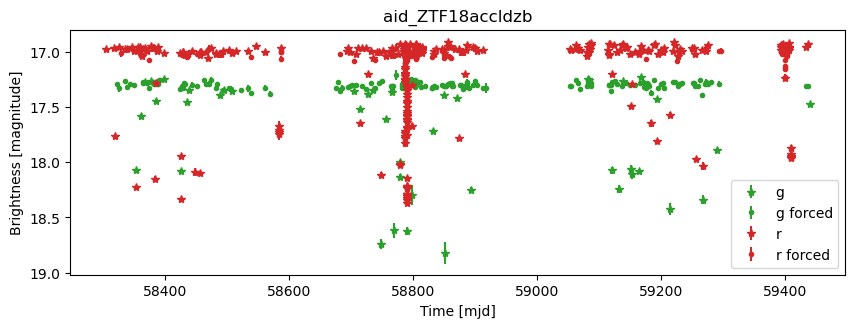

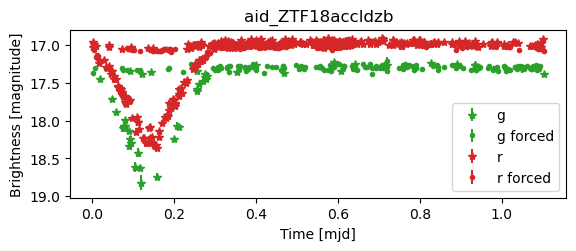

<Figure size 640x480 with 0 Axes>

In [78]:
plt.figure(figsize=(10, 7))
plt.subplot(2, 1, 1)
plot_astro_object(astro_object, unit='magnitude', use_forced_phot=True)
plt.subplot(2, 1, 2)
plot_astro_object(astro_object, unit='magnitude', use_forced_phot=True, period=1.103257)
plt.tight_layout()

In [75]:
bands = list('gr')
period_extractor = PeriodExtractor(
    bands,
    unit='magnitude',
    smallest_period=0.045,
    largest_period=100.0,
    trim_lightcurve_to_n_days=1000.0,
    min_length=15,
    use_forced_photo=True,
    return_power_rates=True,
    shift=0.1
)

In [76]:
period_extractor.compute_features_single_object(astro_object)

In [77]:
astro_object.features.set_index('name').loc['Multiband_period']

value  fid  sid version
name                                        
Multiband_period  2.208342  g,r  ztf   1.0.0
Multiband_period  1.103266  g,r  ztf   1.0.0
Multiband_period  1.103257  g,r  ztf   1.0.0

In [25]:
def all_features_from_astro_objects(astro_objects: List[AstroObject]) -> pd.DataFrame:
    first_object = astro_objects[0]
    features = first_object.features.drop_duplicates(subset=['name', 'fid'])
    features = features.set_index(['name', 'fid'])
    indexes = features.index.values
    
    feature_list = []
    oids = []
    for astro_object in astro_objects:
        features = astro_object.features.drop_duplicates(subset=['name', 'fid'])
        features = features.set_index(['name', 'fid'])
        feature_list.append(features.loc[indexes]['value'].values)
        
        metadata = astro_object.metadata
        oid = metadata[metadata['name'] == 'oid']['value'].values[0]
        oids.append(oid)
    
    df = pd.DataFrame(
        data=np.stack(feature_list, axis=0),
        index=oids,
        columns=['_'.join([str(i) for i in pair]) for pair in indexes]
    )
    return df

In [27]:
astro_objects = pd.read_pickle('data_231130/astro_objects_batch_0000.pkl')
features_df = all_features_from_astro_objects(astro_objects)
features_df

g-r_mean_g,r  g-r_max_g,r  MHPS_ratio_g    MHPS_low_g  \
ZTF17aaaaajz      3.606684     3.822370     30.711777  7.742205e-01   
ZTF17aaaaauo      2.866425     3.132062     61.113964  7.562989e-01   
ZTF17aaaabte      0.400895     0.314832      6.490030  1.238626e+01   
ZTF17aaaactd      2.424023     2.139564     11.487591  3.325856e+02   
ZTF17aaaactj      0.429526     0.422517      2.815125  1.295501e+01   
...                    ...          ...           ...           ...   
ZTF17aaadzce      3.302590     3.112220    572.060181  1.626767e+07   
ZTF17aaadzcj      2.051862     1.840399      2.158851  5.279055e+02   
ZTF17aaadzee      3.634099     3.399016    135.515701  2.397030e+00   
ZTF17aaadzhc      2.258741     3.379089    771.852295  8.116357e+01   
ZTF17aaadzrk      0.212100     0.014114      1.640614  1.090269e+03   

               MHPS_high_g  MHPS_non_zero_g  MHPS_PN_flag_g  MHPS_ratio_r  \
ZTF17aaaaajz      0.025209             16.0             0.0    175.091080   
ZTF17aaaaauo      0.012375             91.0             0.0    415.129730   
ZTF17aaaabte      1.908505            350.0             0.0      4.810787   
ZTF17aaaactd     28.951729             55.0             0.0      3.714489   
ZTF17aaaactj      4.601929            231.0             0.0      2.369968   
...                    ...              ...             ...           ...   
ZTF17aaadzce  28436.990234            249.0             0.0    694.115417   
ZTF17aaadzcj    244.530716            279.0             0.0      1.579714   
ZTF17aaadzee      0.017688            237.0             0.0    483.066925   
ZTF17aaadzhc      0.105154            367.0             0.0    962.918335   
ZTF17aaadzrk    664.549561            348.0             0.0      2.688525   

               MHPS_low_r  MHPS_high_r  ...  last_brightness_before_band_r  \
ZTF17aaaaajz     6.968954     0.039802  ...                            NaN   
ZTF17aaaaauo    31.327026     0.075463  ...                            NaN   
ZTF17aaaabte    13.221408     2.748284  ...                            NaN   
ZTF17aaaactd    57.510006    15.482615  ...                            NaN   
ZTF17aaaactj    41.278934    17.417503  ...                     -26.374397   
...                   ...          ...  ...                            ...   
ZTF17aaadzce  2320.278320     3.342785  ...                            NaN   
ZTF17aaadzcj   954.759094   604.387146  ...                            NaN   
ZTF17aaadzee     5.131762     0.010623  ...                            NaN   
ZTF17aaadzhc   102.770966     0.106729  ...                            NaN   
ZTF17aaadzrk     5.894239     2.192369  ...                            NaN   

              max_brightness_before_band_r  median_brightness_before_band_r  \
ZTF17aaaaajz                           NaN                              NaN   
ZTF17aaaaauo                           NaN                              NaN   
ZTF17aaaabte                           NaN                              NaN   
ZTF17aaaactd                           NaN                              NaN   
ZTF17aaaactj                    -26.374397                        -45.43075   
...                                    ...                              ...   
ZTF17aaadzce                           NaN                              NaN   
ZTF17aaadzcj                           NaN                              NaN   
ZTF17aaadzee                           NaN                              NaN   
ZTF17aaadzhc                           NaN                              NaN   
ZTF17aaadzrk                           NaN                              NaN   

              n_forced_phot_band_after_r  max_brightness_after_band_r  \
ZTF17aaaaajz                        30.0                    14.045668   
ZTF17aaaaauo                       335.0                    38.115958   
ZTF17aaaabte                         8.0                    23.676932   
ZTF17aaaactd                        18.0                  

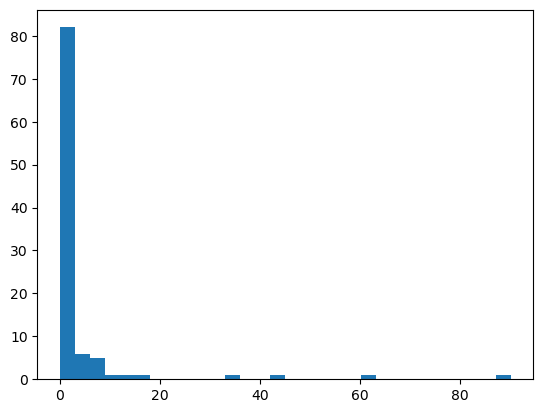

In [28]:
plt.hist(features_df['Multiband_period_g,r'].values, bins=30);

In [29]:
labels_batch = object_info.loc[features_df.index]
for alerceclass in ['DSCT', 'RRLab', 'RRLc', 'EBEW', 'EA', 'CEP']:
    oids_class = labels_batch[labels_batch['alerceclass'] == alerceclass].index.values
    print(alerceclass, features_df.loc[oids_class]['Multiband_period_g,r'].describe())

DSCT count    2.000000
mean     0.079852
std      0.029088
min      0.059284
25%      0.069568
50%      0.079852
75%      0.090137
max      0.100421
Name: Multiband_period_g,r, dtype: float64
RRLab count    10.000000
mean      0.500543
std       0.056038
min       0.371709
25%       0.478907
50%       0.516837
75%       0.525392
max       0.575132
Name: Multiband_period_g,r, dtype: float64
RRLc count    5.000000
mean     0.330043
std      0.062160
min      0.236553
25%      0.319196
50%      0.320802
75%      0.381267
max      0.392400
Name: Multiband_period_g,r, dtype: float64
EBEW count    12.000000
mean      0.199072
std       0.086058
min       0.123461
25%       0.150370
50%       0.166434
75%       0.199909
max       0.396590
Name: Multiband_period_g,r, dtype: float64
EA count    8.000000
mean     0.572699
std      0.305049
min      0.212918
25%      0.406474
50%      0.507733
75%      0.638459
max      1.150551
Name: Multiband_period_g,r, dtype: float64
CEP count    18.000000
me